In [40]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
# Faz este append para poder importar o fitness_function que está na pasta acima
sys.path.append('../')
sys.path.append('../model')

from fitness_function import RocketFitness, bound_values, fitness_func
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from itertools import product
from tqdm import tqdm
from sklearn.model_selection import ParameterGrid


In [2]:
# Load the data
def read_json_file(path):
    with open(path, 'r') as f:
        list_dict_alg = json.load(f)
    return list_dict_alg

path = '/home/ubuntu/Mestrado/modelo_foguete/train_comparsion/results/depso_best_model.json'
dict_alg = read_json_file(path)


In [3]:

def filter_limits(dict_alg, limit_fitness_calls, exec_time_limit):


    # Encontra o indice do melhor indivíduo dentro dos limites estabelecidos

    print(dict_alg['best_ind_list'])
    best_ind_list = np.array(dict_alg['best_ind_list'])
    avg_ind_list = np.array(dict_alg['avg_ind_list'])
    fitness_calls_list = np.array(dict_alg['fitness_calls'])
    exec_time_list = np.array(dict_alg['exec_time_list'])
    total_time = dict_alg['total_time']

    mask = (fitness_calls_list <= limit_fitness_calls) & (exec_time_list <= exec_time_limit)

    best_ind_list = best_ind_list[mask]
    avg_ind_list = avg_ind_list[mask]
    fitness_calls_list = fitness_calls_list[mask]
    exec_time_list = exec_time_list[mask]

    #print(best_ind_list.shape)

    # Cria o dataframe
    df = pd.DataFrame(data={'best_ind': best_ind_list, 'avg_fitness': avg_ind_list, 'fitness_calls': fitness_calls_list, 'exec_time': exec_time_list})
    df['total_time'] = total_time

    # Encontra o melhor fitness do best_ind e seu respectivo fitness médio e adiciona as listas
    melhor_fitness = df['best_ind'].max()
    fitness_medio = df[df['best_ind'] == melhor_fitness]['avg_fitness'].values[0]

    
    return df

df = filter_limits(dict_alg[0], np.inf, np.inf)
    

[0.5648211139787211, 0.5, 0.5371161434314836, 0.563090621769944, 0.561854012789812, 0.5665179783984485, 0.5562090604994968, 0.5830905172236094, 0.5953598262389747, 0.5946843663682309, 0.5902327514054747, 0.6010440342632892, 0.617112637782584, 0.6283682474931094, 0.63011148148562, 0.6460403670234085, 0.6521047534952258, 0.6603404685414287, 0.6659639377799932, 0.670059552909799, 0.675224432143036, 0.6778879080026411, 0.6787090891888978, 0.6817268727169976, 0.6826768845040063, 0.6860197332460088, 0.6926627158818995, 0.6933543209694433, 0.6947890512103616, 0.6949781040762769, 0.6963709077221318, 0.6964199353667077, 0.6965282003530109, 0.6968189244477114, 0.6970233981202926, 0.6968613732368971, 0.6991783764996276, 0.6996644564084173, 0.7012102397664732, 0.7012190582770852, 0.7038363267573751, 0.7043774126128844, 0.7061640396607946, 0.7054679722835342, 0.7066419454552039, 0.7070224134709298, 0.7072616120675141, 0.7073070060169816, 0.7074185562935617, 0.7073717783707604, 0.707466652107851, 0.

In [45]:
df = df.loc[df['best_ind'] > 0]
# Cria uma coluna "best_known" com o melhor fitness conhecido, que é um max() cumulativo
df['best_known'] = df['best_ind'].cummax()
# encontra o melhor individuo
best_ind = df['best_ind'].max()
print(best_ind)
# Encontra o número de chamadas de fintess em que o best_ind ocorre a primeira vez
fitness_calls = df.loc[df['best_ind'] == best_ind]['fitness_calls'].values[0]
print( fitness_calls )
# Encontra o índice da linha em que o best_ind ocorre a primeira vez
index = df.loc[df['best_ind'] == best_ind].index[0]


0.7112480759749749
15545.0


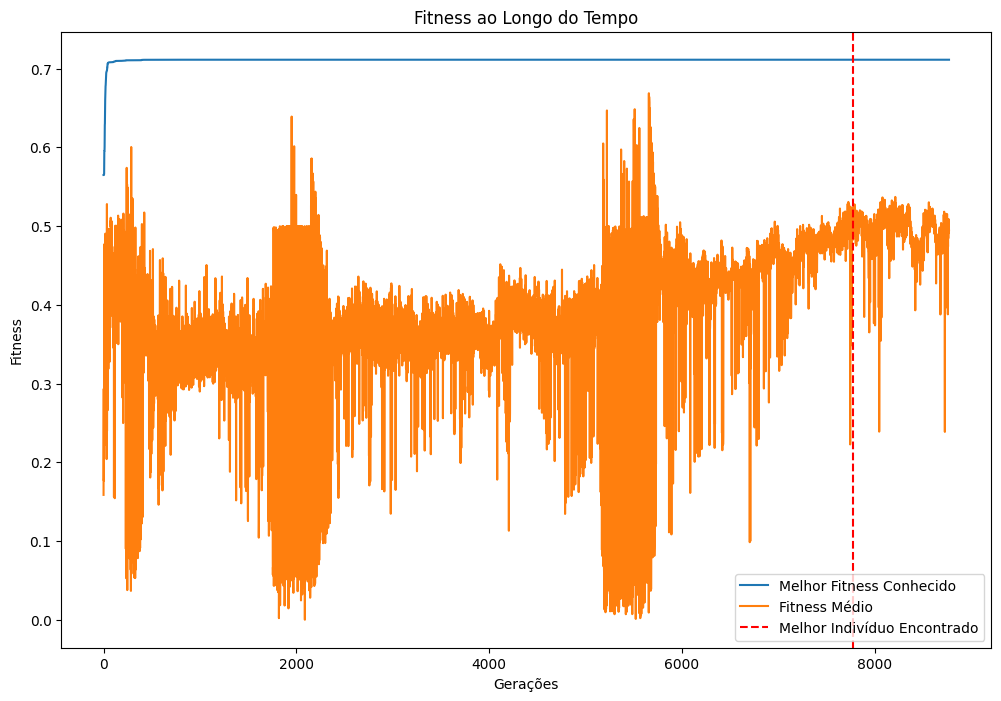

In [51]:
# Faz a visualização do gráfico de treinamento do modelo atraés do dataframe df
# mostrando o best_ind e o avg_fitness ao longo do tempo
plt.figure(figsize=(12, 8))
plt.plot(df['best_known'], label='Melhor Fitness Conhecido')
plt.plot(df['avg_fitness'], label='Fitness Médio')
plt.axvline(index, color='red', linestyle='--', label='Melhor Indivíduo Encontrado')
plt.title('Fitness ao Longo do Tempo')
plt.xlabel('Gerações')
plt.ylabel('Fitness')
plt.legend()
plt.show()

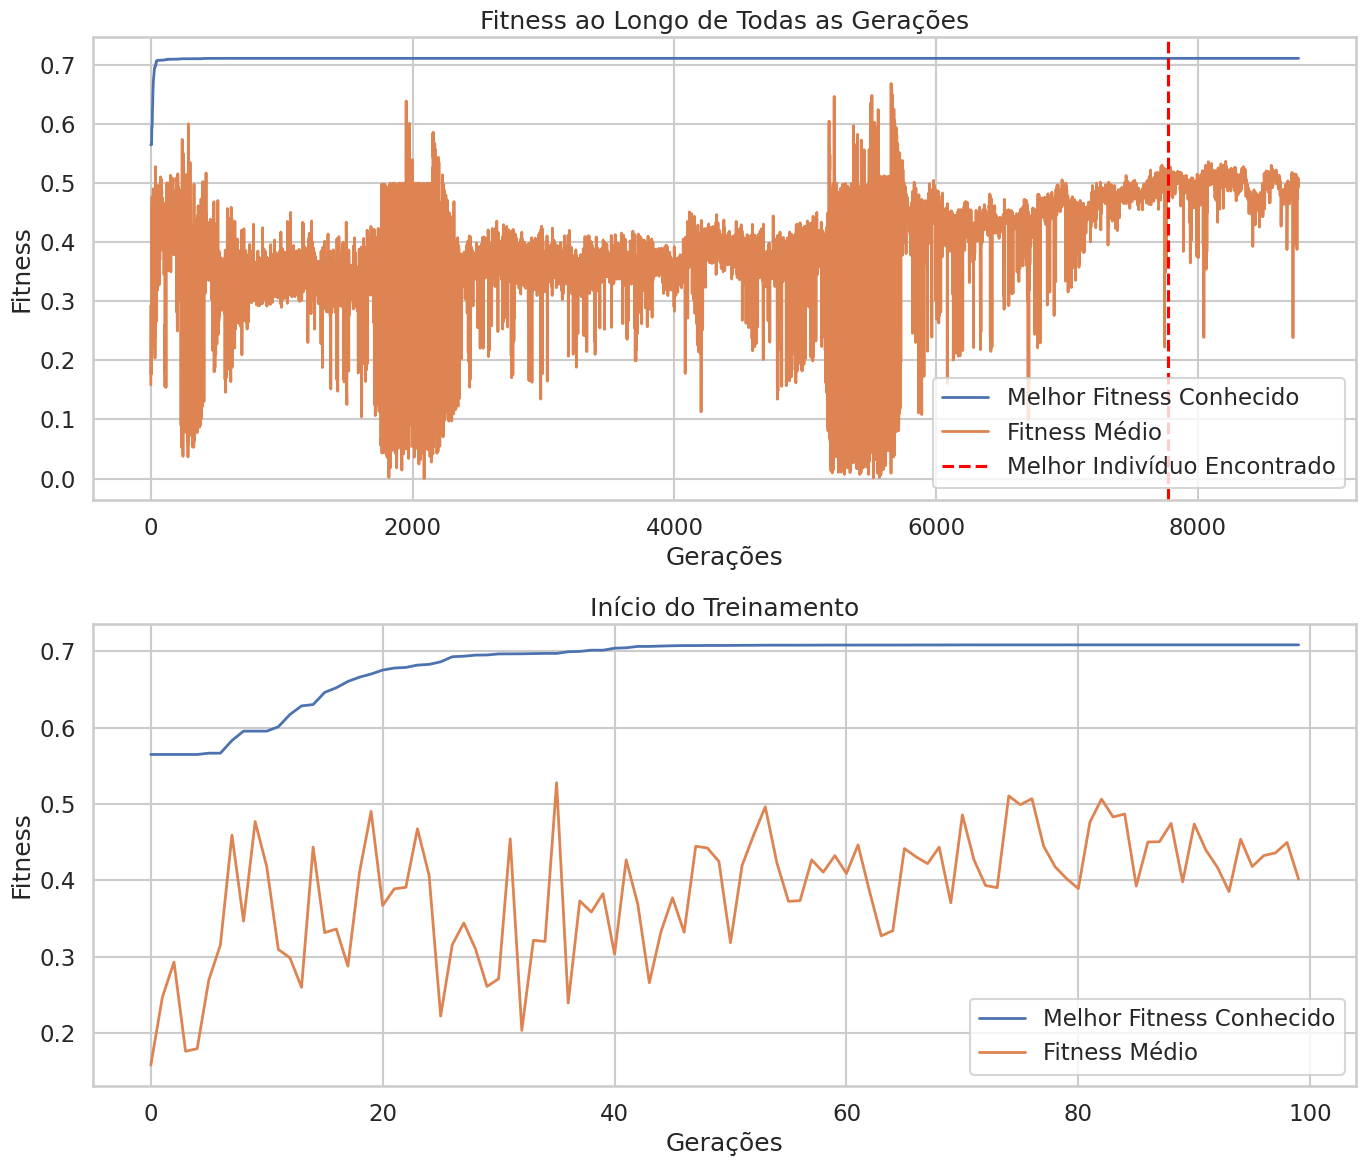

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Supondo que df seja o seu DataFrame
# df = pd.read_csv('seu_arquivo.csv') # Exemplo de como carregar o DataFrame

sns.set_theme(context='talk', style='whitegrid') # Configura o tema com Seaborn para um look mais acadêmico

fig, axes = plt.subplots(2, 1, figsize=(14, 12)) # Cria uma figura com duas subfiguras (subplots)

# Plot para o treinamento completo
axes[0].plot(df['best_known'], label='Melhor Fitness Conhecido', linewidth=2)
axes[0].plot(df['avg_fitness'], label='Fitness Médio', linewidth=2)
axes[0].axvline(index, color='red', linestyle='--', label='Melhor Indivíduo Encontrado')
axes[0].set_title('Fitness ao Longo de Todas as Gerações')
axes[0].set_xlabel('Gerações')
axes[0].set_ylabel('Fitness')
axes[0].legend()

# Plot para visualizar apenas o início do treinamento
inicio_treinamento = 100 # Ajuste este valor para quantas gerações você quer visualizar no começo
axes[1].plot(df['best_known'][:inicio_treinamento], label='Melhor Fitness Conhecido', linewidth=2)
axes[1].plot(df['avg_fitness'][:inicio_treinamento], label='Fitness Médio', linewidth=2)
#axes[1].axvline(index if index < inicio_treinamento else -1, color='red', linestyle='--', label='Melhor Indivíduo Encontrado' if index < inicio_treinamento else '')
axes[1].set_title('Início do Treinamento')
axes[1].set_xlabel('Gerações')
axes[1].set_ylabel('Fitness')
axes[1].legend()

plt.tight_layout() # Ajusta automaticamente os subplots para que caibam na figura
plt.show()


In [5]:
dict_alg[0]['best_solutions']
# Encontra a best_solution que está associada ao mesmo número de chamadas de fitness
best_solution = len(dict_alg[0]['best_solutions'])
print(best_solution)

1000


In [6]:
rocket_fitness = RocketFitness(bound_values, num_workers=4)
random_values = np.random.rand(100,10)
fitness_func_class = rocket_fitness.calc_fitness


In [7]:
fitness_val  = fitness_func_class(np.array(dict_alg[0]['best_solutions']))


[0.71124808 0.71124808 0.71124808 0.71124808 0.71124808 0.71124808
 0.71124808 0.71124808 0.71124808 0.71124808 0.71124808 0.71124808
 0.71124808 0.71124808 0.71124808 0.71124808 0.71124808 0.71124808
 0.71124808 0.71124808 0.71124808 0.71124808 0.71124808 0.71124808
 0.71124808 0.71124808 0.71124808 0.71124808 0.71124808 0.71124808
 0.71124808 0.71124808 0.71124808 0.71124808 0.70988017 0.71124808
 0.71124808 0.71124808 0.71124808 0.71124808 0.71124808 0.71124808
 0.71124808 0.71124808 0.71124808 0.71124808 0.71124808 0.71124808
 0.71124808 0.71124808 0.71124808 0.5        0.71124808 0.71124808
 0.71124808 0.71124808 0.71124808 0.71124808 0.71124808 0.71124808
 0.71124808 0.71124808 0.71124808 0.71124808 0.71124808 0.71124808
 0.71124808 0.71124808 0.71124808 0.71124808 0.71124808 0.71124808
 0.71124808 0.71124808 0.71124808 0.71124808 0.71124808 0.71124808
 0.71124808 0.71124808 0.70827169 0.71124808 0.71124808 0.71124808
 0.71124808 0.71124808 0.71124808 0.71124808 0.71124808 0.7112

In [31]:
best_ind_space = np.array(dict_alg[0]['best_solutions'][fitness_val.argmax()])
print(best_ind_space)
print(fitness_val.argmax())

[0.35527318 0.27777778 0.92814155 0.6453063  1.         0.30713256
 0.05285622 0.17676768 0.08187186 0.13020787]
0


In [56]:
min_mat = bound_values.T[0, :]
max_mat = bound_values.T[1,:]
best_sol_denorm = best_ind_space * (max_mat - min_mat) + min_mat
print(best_sol_denorm)
# Printa o que é cada valor
print("Comb Pressure (Superior): ", best_sol_denorm[0])
print("MR (Superior): ", best_sol_denorm[1])
print("nozzle Diam (Superior): ", best_sol_denorm[2])
print("eps (Superior): ", best_sol_denorm[3])
print("Comb Pressure (Inferior): ", best_sol_denorm[4])
print("MR (Inferior): ", best_sol_denorm[5])
print("nozzle Diam (Inferior): ", best_sol_denorm[6])
print("eps (Inferior): ", best_sol_denorm[7])
print("Raio (Superior): ", best_sol_denorm[8])
print("Raio (Inferior): ", best_sol_denorm[9])

[1.13029223e+07 3.22222221e+00 5.60477853e-01 1.29770648e+02
 3.00000000e+07 3.45706050e+00 7.90709228e-02 3.70000015e+01
 1.73684675e+00 2.17187087e+00]
Comb Pressure (Superior):  11302922.278940737
MR (Superior):  3.222222208976747
nozzle Diam (Superior):  0.56047785328391
eps (Superior):  129.77064781313183
Comb Pressure (Inferior):  29999999.99999956
MR (Inferior):  3.4570604978403745
nozzle Diam (Inferior):  0.07907092282861747
eps (Inferior):  37.00000153481984
Raio (Superior):  1.7368467513235946
Raio (Inferior):  2.1718708662040376


In [58]:

import numpy as np
from model.build_rocket import RocketModel
import sys, os
import math
import concurrent.futures
import timeit
import multiprocessing
from functools import partial
import joblib
import time
from rocketcea.cea_obj_w_units import CEA_Obj


reg_path = '/home/ubuntu/Mestrado/modelo_foguete/model/engines/decision_tree_model.pkl'
reg_model = joblib.load(reg_path)
#reg_model = False
cea_obj = ceaObj = CEA_Obj( oxName='LOX', fuelName='RP-1', pressure_units='MPa', cstar_units='m/s', temperature_units='K')


def fitness_func(parameters_list):
    #parameters_list = denormalize(parameters_list, bounds)
    engineParams = {"oxName": "LOX",
                    "fuelName": "RP-1",
                    "combPressure": parameters_list[0],
                    "MR": parameters_list[1],
                    "nozzleDiam": parameters_list[2],
                    "eps": parameters_list[3]}

    engineParamsFirst = {"oxName": "LOX",
                    "fuelName": "RP-1",
                    "combPressure": parameters_list[4],
                    "MR": parameters_list[5],
                    "nozzleDiam": parameters_list[6],
                    "eps": parameters_list[7]}

    upperStageStructureParams = {"oxName": "LOX",
                                 "fuelName": "RP1",
                                 "MR": parameters_list[1],
                                 "tankPressure": 0.1,
                                 "radius": parameters_list[8],
                                } # 0 porque ainda nao temos esse valor
    firstStageStructureParams = {"oxName": "LOX",
                                "fuelName": "RP1",
                                "MR": parameters_list[5],
                                "tankPressure": 0.1,
                                "radius": parameters_list[9],
                            } # 0 porque ainda nao temos esse valor
    payloadBayParams = {"payloadHeight": 6.7,
                    "payloadRadius": 4.6/2,
                    "payloadMass": 4850,
                    "lowerStageRadius": parameters_list[8],
                    "lowerRocketSurfaceArea": 0} # 0 porque ainda nao temos esse valor

    rocket_model = RocketModel(upperEngineParams=engineParams,
                               firstEngineParams=engineParamsFirst,
                               payloadBayParams=payloadBayParams,
                               upperStageStructureParams=upperStageStructureParams,
                               firstStageStructureParams = firstStageStructureParams,
                               deltaV_upperStage=9000,
                               deltaV_landing=2000,
                               deltaV_firstStage=3000,
                               nEnginesUpperStage=1,
                               nEnignesFirstStage=9,
                               reg_model=reg_model,
                               cea_obj=cea_obj)

    rocket_model.build_all()
    glow = rocket_model.glow
    rocket_model.print_all_parameters()

fitness_func(best_sol_denorm)


***** Payload Bay *****
Cone Area: 37.653733282525664 [kg]
Cylinder Area: 96.82388558363742 [kg]
Frustrum Area: 38.43396720491011 [kg]
Total Payload Fairing Mass: 1601.7463517854253 [kg]
Electronic Mass: 412.709887722777 [kg]
Power Mass: 95.94266759891397 [kg]
Total Payload Mass: 6960.398907107116 [kg]
***** Upper Stage Engine *****
Isp Vac (s): 383.686789276192
Isp Sea (s): 224.5265186174686
Mass flow (kg/s): 1622.3776966075795
Thrust Vac (kN): 7552.245465838707
Thrust Sea (kN): 4350.526068658547
***** Upper Stage Structure *****
Ox Tank Cylyndrical Height: 3.051613763237873 [m]
Fuel Tank Cylyndrical Height: 0.0 [m]
Ox Tank Volume: 50.86717266184778 [m3]
Fuel Tank Volume: 21.94689628494124 [m3]
Intertank Structure Mass: 718.3440338225046 [kg]
Separation Explosives Mass: 6.0555470491831915 [kg]
Tank Fairing Mass: 525.8069965439354 [kg]
Total Stage Height: 14.159701750331052 [m]
Total Stage Dry Mass: 4001.8824644213905 [kg]
Total Stage Surface Area: 142.53969979849268 [m2]
***** First S

In [ ]:
# Faz a visualização do gráfico de treinamento 